# Stock Price Analysis and Prediction

In this project, we analyze historical stock prices and build a predictive model to forecast future prices. We will use Python libraries such as pandas, numpy, matplotlib, seaborn and sci-kit-learn for data manipulation, visualization, and modeling.

## Steps
1. Setup Environment
2. Data Collection
3. Data Exploration and Visualization
4. Data Preparation
5. Model Building and Training
6. Model Evaluation

## 1. Setup Environment

First, we need to install and import the required libraries:
- pandas
- numpy
- matplotlib
- seaborn
- scikit-learn
- yfinance

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import yfinance as yf

C:\Users\tajki\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


## 2. Data Collection

We will use `yfinance` library to download historical stock price data for Tesla (TSLA) from Yahoo Finance

In [2]:
# Download the stock data
stock_data = yf.download('TSLA', start='2013-01-01', end='2023-01-01')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2012-12-31  2.200000  2.264667  2.200000  2.258000   2.258000   8923500
2013-01-02  2.333333  2.363333  2.314000  2.357333   2.357333  17922000
2013-01-03  2.345333  2.363333  2.316667  2.318000   2.318000  11130000
2013-01-04  2.320000  2.320000  2.261333  2.293333   2.293333  10110000
2013-01-07  2.320000  2.320000  2.260000  2.289333   2.289333   6630000

## Data Exploration and Visualization

We will explore and visualize the historical price data to identify trends and patterns

### Plot the Closing Price
We start by plotting the closing price over time to get an initial sense of how the stock has performed historically.

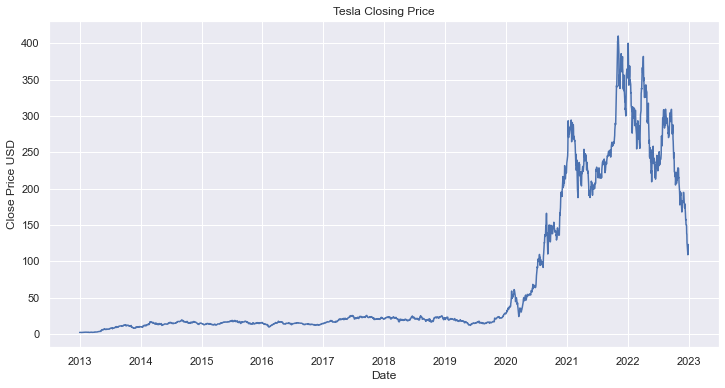

In [3]:
# Plot the 'Close' or closing price
plt.figure(figsize=(12, 6))
sns.set(style='darkgrid')
sns.lineplot(x=stock_data.index, y=stock_data['Close'])
plt.title('Tesla Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.show()

### Calculate and Plot Moving Averages

We calculate the 50-day and 100-day moving averages to smooth out short term fluctuations and highlight longer-term trends. We will plot these moving averages along with the closing prices.

In [4]:
# Calculate the moving averages of closing price
stock_data['50MA'] = stock_data['Close'].rolling(window=50).mean()
stock_data['100MA'] = stock_data['Close'].rolling(window=100).mean()

stock_data.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-12-23  126.370003  128.619995  121.019997  123.150002  123.150002   
2022-12-27  117.500000  119.669998  108.760002  109.099998  109.099998   
2022-12-28  110.349998  116.269997  108.239998  112.709999  112.709999   
2022-12-29  120.389999  123.570000  117.500000  121.820000  121.820000   
2022-12-30  119.949997  124.480003  119.750000  123.180000  123.180000   

               Volume      50MA       100MA  
Date                                         
2022-12-23  166989700  187.7900  234.019467  
2022-12-27  208643400  185.8722  232.024134  
2022-12-28  221070500  183.7394  230.269534  
2022-12-29  221923300  181.7720  228.583501  
2022-12-30  157777300  179.7948  226.981967

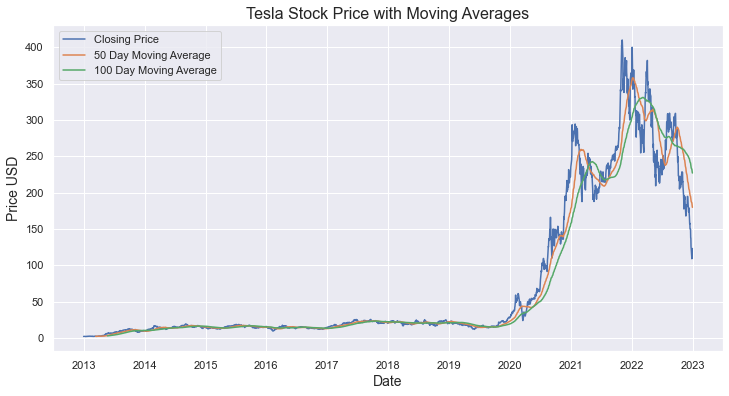

In [5]:
# Plotting the closing price with the moving averages
plt.figure(figsize=(12,6))
sns.lineplot(data=stock_data, x=stock_data.index, y=stock_data['Close'], label='Closing Price')
sns.lineplot(data=stock_data, x=stock_data.index, y=stock_data['50MA'], label='50 Day Moving Average')
sns.lineplot(data=stock_data, x=stock_data.index, y=stock_data['100MA'], label='100 Day Moving Average')
plt.title('Tesla Stock Price with Moving Averages', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price USD', fontsize=14)
plt.show()

## 4. Data Preparation

We will prepare the data for modeling by creating new features, handling missing values, and splitting the data into training and testing sets.

### Feature Engineering
We create new features such as returns, volatility, and moving averages

In [6]:
# Calculate the return for each day and the volatility of the stock for 20 days window
stock_data['Return'] = stock_data['Close'].pct_change()
stock_data['Volatility'] = stock_data['Close'].rolling(window=20).std()

stock_data.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-12-23  126.370003  128.619995  121.019997  123.150002  123.150002   
2022-12-27  117.500000  119.669998  108.760002  109.099998  109.099998   
2022-12-28  110.349998  116.269997  108.239998  112.709999  112.709999   
2022-12-29  120.389999  123.570000  117.500000  121.820000  121.820000   
2022-12-30  119.949997  124.480003  119.750000  123.180000  123.180000   

               Volume      50MA       100MA    Return  Volatility  
Date                                                               
2022-12-23  166989700  187.7900  234.019467 -0.017551   22.371719  
2022-12-27  208643400  185.8722  232.024134 -0.114089   25.204712  
2022-12-28  221070500  183.7394  230.269534  0.033089   26.995549  
2022-12-29  221923300  181.7720  228.583501  0.080827   26.713017  
2022-12-30  157777300  179.7948  226.981967  0.011164   25.814669

### Handling missing values
We drop any rows that have null value to prepare the data for training

In [7]:
# Drop any null value
stock_data = stock_data.dropna()

stock_data.head()

Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2013-05-23  5.654000  6.200667  5.536667  6.182000   6.182000  180333000   
2013-05-24  6.173333  6.530000  6.133333  6.472000   6.472000  241863000   
2013-05-28  6.770000  7.383333  6.686667  7.355333   7.355333  295378500   
2013-05-29  7.570000  7.660000  6.600000  6.975333   6.975333  376492500   
2013-05-30  6.830667  7.302667  6.746667  6.996667   6.996667  242005500   

                50MA     100MA    Return  Volatility  
Date                                                  
2013-05-23  3.594133  3.011240  0.062930    1.113520  
2013-05-24  3.674440  3.053380  0.046910    1.124883  
2013-05-28  3.774493  3.103360  0.136485    1.204408  
2013-05-29  3.867133  3.149933 -0.051663    1.215885  
2013-05-30  3.960293  3.196967  0.003058    1.200074

### Feature Selection
We select the features which will be beneficial for the model training.

In [8]:
# Select Features
features = stock_data[['Close', '50MA', '100MA', 'Return', 'Volatility']]

features.head()

Close      50MA     100MA    Return  Volatility
Date                                                          
2013-05-23  6.182000  3.594133  3.011240  0.062930    1.113520
2013-05-24  6.472000  3.674440  3.053380  0.046910    1.124883
2013-05-28  7.355333  3.774493  3.103360  0.136485    1.204408
2013-05-29  6.975333  3.867133  3.149933 -0.051663    1.215885
2013-05-30  6.996667  3.960293  3.196967  0.003058    1.200074

### Align Features with the Target Variable
We align the features with target variable, which, in this case, is the next day's closing price

### Train-Test Split
We split the data into training and testing sets.

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into train set and test set
X = features
y = stock_data['Close'].shift(-1).dropna() # we're predicting the next days closing price
X = X[:-1] # to align with y value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

### Normalize the Data
We normalize the features to ensure they are on a similar scale

In [10]:
from sklearn.preprocessing import MinMaxScaler as MMS

# Normalize the data for better training and prediction
scaler = MMS()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Model Building and Training

We will build and train a machine learning model to predict stock prices.

### Train Linear Regression Model
We will use Linear Regression as our initial model to predict the next day's closing price

In [11]:
from sklearn.linear_model import LinearRegression

# train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [12]:
# Make Predictions
y_pred = model.predict(X_test_scaled)

## 6. Model Evaluation

We will evaluate our model using several metrics to understand its performance.

### Evaluation Metrics
We use three key metrics for evaluation:
1. Mean Squared Error (MSE)
2. Mean Absolute Error (MAE)
3. R-squared (R²)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 26.994575974504873
Mean Absolute Error: 2.356854833349876
R-squared: 0.9977587341504001


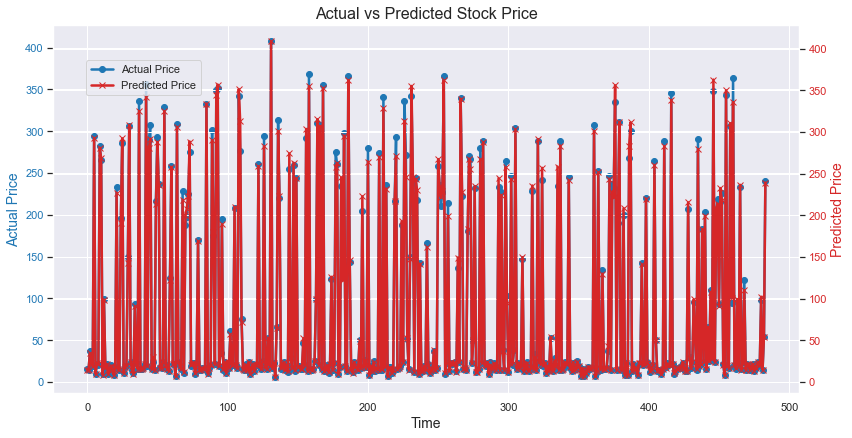

In [14]:
# Plotting the Actual vs Predicted Values
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Actual Price', color=color, fontsize=14)
ax1.plot(range(len(y_test)), y_test.values, label='Actual Price', color=color, linewidth=2.5, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Predicted Price', color=color, fontsize=14)
ax2.plot(range(len(y_test)), y_pred, label='Predicted Price', color=color, linewidth=2.5, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # to prevent labels from overlapping
plt.title('Actual vs Predicted Stock Price', fontsize=16)
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.show()

### Interpretation
We will interpret the evaluation metrics to assess the model's performance.

#### Mean Squared Error (MSE)
- **Value**: 26.99
- **Interpretation**: This metric represents the average squared difference between the actual and predicted values. Although it's not directly interpretable without context on the stock price scale, a lower MSE generally indicates a better model fit. However, MSE can be more sensitive to outliers due to the squaring of errors.

#### Mean Absolute Error (MAE)
- **Value**: 2.36
- **Interpretation**: This metric shows the average absolute difference between the actual and predicted values. An MAE of 2.36 suggests that, on average, the model's predictions are off by about $2.36. This indicates high accuracy and precision in the model's predictions.

#### R-squared (R²)
- **Value**: 0.9978
- **Interpretation**: This value indicates that 99.78% of the variance in the actual stock prices is explained by the model. An R² value close to 1 signifies an excellent fit, meaning the model captures almost all of the variability in the stock prices.

### Overall Assessment
- **MAE** of 2.36 and **R²** of 0.9978 demonstrate that the model is performing exceptionally well, capturing the vast majority of the variability in the stock prices with relatively small average errors.
- **MSE** of 26.99, while higher in absolute terms, aligns with a very good model fit given the high R² and low MAE.

### Practical Implications
- **Accuracy**: The model is highly accurate in predicting stock prices.
- **Reliability**: The high R² value indicates that the predictions are reliable and closely follow the actual data trends.
- **Usefulness**: The low MAE suggests that the predictions are precise and useful for practical applications, such as trading decisions.

The evaluation metrics indicate that our model performs exceptionally well in predicting stock prices, making it a strong candidate for practical applications in financial analysis and trading.

## Conclusion

### Findings

The evaluation metrics indicate that our model performs exceptionally well in predicting stock prices, making it a strong candidate for practical applications in financial analysis and trading. Specifically:
- **Mean Squared Error (MSE)**: 26.99
- **Mean Absolute Error (MAE)**: 2.36
- **R-squared (R²)**: 0.9978

### Potential Improvements and Future Work

Despite the strong performance of the model, there are several areas for potential improvement and future work:

1. **Feature Engineering**:
   - Incorporate sentiment analysis from financial news and social media.

2. **Advanced Modeling Techniques**:
   - Experiment with more complex models such as Random Forest, Gradient Boosting, XGBoost, or deep learning models like LSTM and GRU.
   - Implement ensemble methods to combine predictions from multiple models for improved accuracy.

3. **Hyperparameter Tuning**:
   - Perform hyperparameter tuning using techniques such as Grid Search or Random Search to optimize model performance.

4. **Cross-Validation**:
   - Implement cross-validation to ensure the model's robustness and generalizability to unseen data.

5. **Time Series Analysis**:
   - Explore more advanced time series forecasting methods such as ARIMA, or Prophet.

6. **Real-Time Prediction**:
   - Develop a pipeline for real-time data processing and prediction to use the model in a live trading environment.

7. **Backtesting and Strategy Development**:
   - Backtest the predictive model within a trading strategy to evaluate its practical utility in generating trading signals and making investment decisions.
   - Analyze transaction costs and slippage to understand the real-world performance of the trading strategy.
   
By addressing these potential improvements and conducting further research, we can enhance the accuracy, robustness, and practical applicability of the stock price prediction model.
